# Kaggle Project

## Dataset Review

**URL:** https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset/code

**Task:**

The "Employee" Kaggle dataset contains information about the employees in a company, which provides valuable insights into the workforce.

In this Kaggle dataset analysis project, the Logistic Regression model built and trained to examine the "Employee" Kaggle dataset before was improved and enhanced to achieve higher model performance. A high model performance will create patterns on the leave-taking behavior among employees.

**Datasets**

* Train dataset: 70% of the total 4653 datapoints

* Validation dataset: 15% of the total 4653 datapoints

* Test dataset: 15% of the total 4653 datapoints

**Features(x):**

1) Education: The educational qualifications of employees, including degree, institution, and field of study.
2) Joining Year: The year each employee joined the company, indicating their length of service.
3) City: The location or city where each employee is based or works.
4) Payment Tier: Categorization of employees into different salary tiers.
5) Age: The age of each employee, providing demographic insights.
6) Gender: Gender identity of employees, promoting diversity analysis.
7) Ever Benched: Indicates if an employee has ever been temporarily without assigned work.
8) Experience in Current Domain: The number of years of experience employees have in their current field.

**Target(y):**

9) Leave or Not: the target column, where 1 means the employee will take a leave, and 0 means the employee will not take a leave. 

---

## Model Building

### 1. Data Preprocessing

#### 1.1 Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv("C:\\Users\\Portus\\Downloads\\Employee.csv")
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [3]:
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [4]:
data.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

#### 1.2 Label Encoding 

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Education', 'City', 'Gender', 'EverBenched']

#Apply label encoding to each categorical column
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Education                  4653 non-null   int32
 1   JoiningYear                4653 non-null   int64
 2   City                       4653 non-null   int32
 3   PaymentTier                4653 non-null   int64
 4   Age                        4653 non-null   int64
 5   Gender                     4653 non-null   int32
 6   EverBenched                4653 non-null   int32
 7   ExperienceInCurrentDomain  4653 non-null   int64
 8   LeaveOrNot                 4653 non-null   int64
dtypes: int32(4), int64(5)
memory usage: 254.6 KB


#### 1.3 Features (x) and Target Variable (y)

In [6]:
x = data.drop('LeaveOrNot',axis = 1)
y = data['LeaveOrNot']

x.shape, y.shape

((4653, 8), (4653,))

##### 1.3.1 Data Normalization

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

#### 1.4 Data Splitting

In [8]:
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1765, random_state=42)

---

### 2. Model Construction

#### 2.1 Logistic Regression

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

In [10]:
x_train = x_train.values if isinstance(x_train, pd.Series) else x_train
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

x_val = x_val.values if isinstance(x_val, pd.Series) else x_val
y_val = y_val.values if isinstance(y_val, pd.Series) else y_val

x_test = x_test.values if isinstance(x_test, pd.Series) else x_test
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test

In [11]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

##### 2.1.1 Logistic Regression - Training and Validation

In [12]:
input_size = x_train.shape[1]
hidden_size = 500

model_lr_pytorch = nn.Sequential(nn.Linear(input_size, hidden_size), nn.ReLU(), nn.Linear(hidden_size, 1), nn.Sigmoid())
criterion = nn.BCELoss()
optimizer = optim.Adam(model_lr_pytorch.parameters(), lr=0.001)

In [13]:
num_epochs = 1500
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model_lr_pytorch(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        model_lr_pytorch.eval()  # Set the model to evaluation mode
        val_outputs = model_lr_pytorch(x_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor).item()
        
        val_preds = (val_outputs >= 0.5).float()
        val_acc = (val_preds == y_val_tensor).sum().item() / len(y_val_tensor)
        
        model_lr_pytorch.train()  # Set the model back to training mode
        
        print(f"Epoch [{epoch + 1}/{num_epochs}]")
        print(f"Train Loss: {loss.item():.4f}")
        print(f"Validation Loss: {val_loss:.4f}")
        print(f"Validation Accuracy: {val_acc:.4f}")

Epoch [1/1500]
Train Loss: 0.6876
Validation Loss: 0.6768
Validation Accuracy: 0.6438
Epoch [2/1500]
Train Loss: 0.6743
Validation Loss: 0.6674
Validation Accuracy: 0.6438
Epoch [3/1500]
Train Loss: 0.6632
Validation Loss: 0.6600
Validation Accuracy: 0.6438
Epoch [4/1500]
Train Loss: 0.6540
Validation Loss: 0.6544
Validation Accuracy: 0.6438
Epoch [5/1500]
Train Loss: 0.6467
Validation Loss: 0.6503
Validation Accuracy: 0.6438
Epoch [6/1500]
Train Loss: 0.6409
Validation Loss: 0.6473
Validation Accuracy: 0.6438
Epoch [7/1500]
Train Loss: 0.6365
Validation Loss: 0.6453
Validation Accuracy: 0.6438
Epoch [8/1500]
Train Loss: 0.6330
Validation Loss: 0.6439
Validation Accuracy: 0.6438
Epoch [9/1500]
Train Loss: 0.6303
Validation Loss: 0.6428
Validation Accuracy: 0.6438
Epoch [10/1500]
Train Loss: 0.6281
Validation Loss: 0.6419
Validation Accuracy: 0.6438
Epoch [11/1500]
Train Loss: 0.6261
Validation Loss: 0.6409
Validation Accuracy: 0.6438
Epoch [12/1500]
Train Loss: 0.6242
Validation Loss: 

Epoch [101/1500]
Train Loss: 0.5269
Validation Loss: 0.5415
Validation Accuracy: 0.7296
Epoch [102/1500]
Train Loss: 0.5262
Validation Loss: 0.5406
Validation Accuracy: 0.7296
Epoch [103/1500]
Train Loss: 0.5255
Validation Loss: 0.5398
Validation Accuracy: 0.7310
Epoch [104/1500]
Train Loss: 0.5248
Validation Loss: 0.5389
Validation Accuracy: 0.7310
Epoch [105/1500]
Train Loss: 0.5241
Validation Loss: 0.5381
Validation Accuracy: 0.7339
Epoch [106/1500]
Train Loss: 0.5234
Validation Loss: 0.5372
Validation Accuracy: 0.7339
Epoch [107/1500]
Train Loss: 0.5227
Validation Loss: 0.5364
Validation Accuracy: 0.7339
Epoch [108/1500]
Train Loss: 0.5220
Validation Loss: 0.5355
Validation Accuracy: 0.7339
Epoch [109/1500]
Train Loss: 0.5213
Validation Loss: 0.5347
Validation Accuracy: 0.7353
Epoch [110/1500]
Train Loss: 0.5206
Validation Loss: 0.5339
Validation Accuracy: 0.7368
Epoch [111/1500]
Train Loss: 0.5199
Validation Loss: 0.5330
Validation Accuracy: 0.7368
Epoch [112/1500]
Train Loss: 0.5

Epoch [200/1500]
Train Loss: 0.4712
Validation Loss: 0.4848
Validation Accuracy: 0.7883
Epoch [201/1500]
Train Loss: 0.4708
Validation Loss: 0.4845
Validation Accuracy: 0.7897
Epoch [202/1500]
Train Loss: 0.4704
Validation Loss: 0.4841
Validation Accuracy: 0.7911
Epoch [203/1500]
Train Loss: 0.4700
Validation Loss: 0.4837
Validation Accuracy: 0.7926
Epoch [204/1500]
Train Loss: 0.4695
Validation Loss: 0.4833
Validation Accuracy: 0.7926
Epoch [205/1500]
Train Loss: 0.4691
Validation Loss: 0.4829
Validation Accuracy: 0.7911
Epoch [206/1500]
Train Loss: 0.4687
Validation Loss: 0.4825
Validation Accuracy: 0.7911
Epoch [207/1500]
Train Loss: 0.4682
Validation Loss: 0.4821
Validation Accuracy: 0.7926
Epoch [208/1500]
Train Loss: 0.4678
Validation Loss: 0.4817
Validation Accuracy: 0.7926
Epoch [209/1500]
Train Loss: 0.4674
Validation Loss: 0.4814
Validation Accuracy: 0.7940
Epoch [210/1500]
Train Loss: 0.4670
Validation Loss: 0.4810
Validation Accuracy: 0.7940
Epoch [211/1500]
Train Loss: 0.4

Epoch [300/1500]
Train Loss: 0.4326
Validation Loss: 0.4516
Validation Accuracy: 0.8155
Epoch [301/1500]
Train Loss: 0.4323
Validation Loss: 0.4513
Validation Accuracy: 0.8155
Epoch [302/1500]
Train Loss: 0.4319
Validation Loss: 0.4510
Validation Accuracy: 0.8155
Epoch [303/1500]
Train Loss: 0.4316
Validation Loss: 0.4508
Validation Accuracy: 0.8155
Epoch [304/1500]
Train Loss: 0.4313
Validation Loss: 0.4505
Validation Accuracy: 0.8155
Epoch [305/1500]
Train Loss: 0.4309
Validation Loss: 0.4502
Validation Accuracy: 0.8155
Epoch [306/1500]
Train Loss: 0.4306
Validation Loss: 0.4500
Validation Accuracy: 0.8155
Epoch [307/1500]
Train Loss: 0.4303
Validation Loss: 0.4497
Validation Accuracy: 0.8183
Epoch [308/1500]
Train Loss: 0.4299
Validation Loss: 0.4495
Validation Accuracy: 0.8183
Epoch [309/1500]
Train Loss: 0.4296
Validation Loss: 0.4493
Validation Accuracy: 0.8183
Epoch [310/1500]
Train Loss: 0.4293
Validation Loss: 0.4490
Validation Accuracy: 0.8183
Epoch [311/1500]
Train Loss: 0.4

Epoch [400/1500]
Train Loss: 0.4011
Validation Loss: 0.4274
Validation Accuracy: 0.8298
Epoch [401/1500]
Train Loss: 0.4008
Validation Loss: 0.4272
Validation Accuracy: 0.8298
Epoch [402/1500]
Train Loss: 0.4005
Validation Loss: 0.4270
Validation Accuracy: 0.8298
Epoch [403/1500]
Train Loss: 0.4003
Validation Loss: 0.4269
Validation Accuracy: 0.8312
Epoch [404/1500]
Train Loss: 0.4000
Validation Loss: 0.4267
Validation Accuracy: 0.8312
Epoch [405/1500]
Train Loss: 0.3997
Validation Loss: 0.4265
Validation Accuracy: 0.8326
Epoch [406/1500]
Train Loss: 0.3994
Validation Loss: 0.4263
Validation Accuracy: 0.8326
Epoch [407/1500]
Train Loss: 0.3991
Validation Loss: 0.4262
Validation Accuracy: 0.8326
Epoch [408/1500]
Train Loss: 0.3989
Validation Loss: 0.4260
Validation Accuracy: 0.8326
Epoch [409/1500]
Train Loss: 0.3986
Validation Loss: 0.4258
Validation Accuracy: 0.8326
Epoch [410/1500]
Train Loss: 0.3983
Validation Loss: 0.4257
Validation Accuracy: 0.8326
Epoch [411/1500]
Train Loss: 0.3

Epoch [497/1500]
Train Loss: 0.3785
Validation Loss: 0.4133
Validation Accuracy: 0.8312
Epoch [498/1500]
Train Loss: 0.3783
Validation Loss: 0.4133
Validation Accuracy: 0.8312
Epoch [499/1500]
Train Loss: 0.3781
Validation Loss: 0.4132
Validation Accuracy: 0.8312
Epoch [500/1500]
Train Loss: 0.3779
Validation Loss: 0.4130
Validation Accuracy: 0.8326
Epoch [501/1500]
Train Loss: 0.3777
Validation Loss: 0.4130
Validation Accuracy: 0.8326
Epoch [502/1500]
Train Loss: 0.3775
Validation Loss: 0.4129
Validation Accuracy: 0.8326
Epoch [503/1500]
Train Loss: 0.3773
Validation Loss: 0.4128
Validation Accuracy: 0.8326
Epoch [504/1500]
Train Loss: 0.3771
Validation Loss: 0.4126
Validation Accuracy: 0.8326
Epoch [505/1500]
Train Loss: 0.3769
Validation Loss: 0.4125
Validation Accuracy: 0.8326
Epoch [506/1500]
Train Loss: 0.3767
Validation Loss: 0.4124
Validation Accuracy: 0.8326
Epoch [507/1500]
Train Loss: 0.3765
Validation Loss: 0.4123
Validation Accuracy: 0.8326
Epoch [508/1500]
Train Loss: 0.3

Epoch [593/1500]
Train Loss: 0.3622
Validation Loss: 0.4067
Validation Accuracy: 0.8355
Epoch [594/1500]
Train Loss: 0.3620
Validation Loss: 0.4067
Validation Accuracy: 0.8355
Epoch [595/1500]
Train Loss: 0.3619
Validation Loss: 0.4067
Validation Accuracy: 0.8355
Epoch [596/1500]
Train Loss: 0.3618
Validation Loss: 0.4066
Validation Accuracy: 0.8355
Epoch [597/1500]
Train Loss: 0.3616
Validation Loss: 0.4066
Validation Accuracy: 0.8355
Epoch [598/1500]
Train Loss: 0.3615
Validation Loss: 0.4066
Validation Accuracy: 0.8355
Epoch [599/1500]
Train Loss: 0.3613
Validation Loss: 0.4066
Validation Accuracy: 0.8355
Epoch [600/1500]
Train Loss: 0.3612
Validation Loss: 0.4065
Validation Accuracy: 0.8355
Epoch [601/1500]
Train Loss: 0.3610
Validation Loss: 0.4065
Validation Accuracy: 0.8355
Epoch [602/1500]
Train Loss: 0.3609
Validation Loss: 0.4065
Validation Accuracy: 0.8355
Epoch [603/1500]
Train Loss: 0.3608
Validation Loss: 0.4064
Validation Accuracy: 0.8355
Epoch [604/1500]
Train Loss: 0.3

Epoch [691/1500]
Train Loss: 0.3499
Validation Loss: 0.4035
Validation Accuracy: 0.8355
Epoch [692/1500]
Train Loss: 0.3498
Validation Loss: 0.4034
Validation Accuracy: 0.8355
Epoch [693/1500]
Train Loss: 0.3497
Validation Loss: 0.4034
Validation Accuracy: 0.8355
Epoch [694/1500]
Train Loss: 0.3496
Validation Loss: 0.4034
Validation Accuracy: 0.8355
Epoch [695/1500]
Train Loss: 0.3495
Validation Loss: 0.4033
Validation Accuracy: 0.8355
Epoch [696/1500]
Train Loss: 0.3494
Validation Loss: 0.4033
Validation Accuracy: 0.8355
Epoch [697/1500]
Train Loss: 0.3493
Validation Loss: 0.4033
Validation Accuracy: 0.8355
Epoch [698/1500]
Train Loss: 0.3492
Validation Loss: 0.4033
Validation Accuracy: 0.8355
Epoch [699/1500]
Train Loss: 0.3491
Validation Loss: 0.4033
Validation Accuracy: 0.8355
Epoch [700/1500]
Train Loss: 0.3490
Validation Loss: 0.4033
Validation Accuracy: 0.8355
Epoch [701/1500]
Train Loss: 0.3489
Validation Loss: 0.4033
Validation Accuracy: 0.8355
Epoch [702/1500]
Train Loss: 0.3

Epoch [790/1500]
Train Loss: 0.3404
Validation Loss: 0.4020
Validation Accuracy: 0.8383
Epoch [791/1500]
Train Loss: 0.3404
Validation Loss: 0.4020
Validation Accuracy: 0.8383
Epoch [792/1500]
Train Loss: 0.3403
Validation Loss: 0.4020
Validation Accuracy: 0.8383
Epoch [793/1500]
Train Loss: 0.3402
Validation Loss: 0.4020
Validation Accuracy: 0.8383
Epoch [794/1500]
Train Loss: 0.3401
Validation Loss: 0.4019
Validation Accuracy: 0.8383
Epoch [795/1500]
Train Loss: 0.3400
Validation Loss: 0.4019
Validation Accuracy: 0.8383
Epoch [796/1500]
Train Loss: 0.3399
Validation Loss: 0.4019
Validation Accuracy: 0.8383
Epoch [797/1500]
Train Loss: 0.3398
Validation Loss: 0.4019
Validation Accuracy: 0.8383
Epoch [798/1500]
Train Loss: 0.3397
Validation Loss: 0.4019
Validation Accuracy: 0.8383
Epoch [799/1500]
Train Loss: 0.3397
Validation Loss: 0.4019
Validation Accuracy: 0.8383
Epoch [800/1500]
Train Loss: 0.3396
Validation Loss: 0.4019
Validation Accuracy: 0.8383
Epoch [801/1500]
Train Loss: 0.3

Epoch [886/1500]
Train Loss: 0.3328
Validation Loss: 0.4012
Validation Accuracy: 0.8398
Epoch [887/1500]
Train Loss: 0.3327
Validation Loss: 0.4011
Validation Accuracy: 0.8398
Epoch [888/1500]
Train Loss: 0.3327
Validation Loss: 0.4012
Validation Accuracy: 0.8398
Epoch [889/1500]
Train Loss: 0.3326
Validation Loss: 0.4012
Validation Accuracy: 0.8398
Epoch [890/1500]
Train Loss: 0.3325
Validation Loss: 0.4012
Validation Accuracy: 0.8398
Epoch [891/1500]
Train Loss: 0.3324
Validation Loss: 0.4012
Validation Accuracy: 0.8398
Epoch [892/1500]
Train Loss: 0.3324
Validation Loss: 0.4012
Validation Accuracy: 0.8398
Epoch [893/1500]
Train Loss: 0.3323
Validation Loss: 0.4012
Validation Accuracy: 0.8412
Epoch [894/1500]
Train Loss: 0.3322
Validation Loss: 0.4012
Validation Accuracy: 0.8412
Epoch [895/1500]
Train Loss: 0.3322
Validation Loss: 0.4012
Validation Accuracy: 0.8412
Epoch [896/1500]
Train Loss: 0.3321
Validation Loss: 0.4012
Validation Accuracy: 0.8412
Epoch [897/1500]
Train Loss: 0.3

Epoch [984/1500]
Train Loss: 0.3263
Validation Loss: 0.4015
Validation Accuracy: 0.8383
Epoch [985/1500]
Train Loss: 0.3263
Validation Loss: 0.4014
Validation Accuracy: 0.8383
Epoch [986/1500]
Train Loss: 0.3262
Validation Loss: 0.4016
Validation Accuracy: 0.8383
Epoch [987/1500]
Train Loss: 0.3261
Validation Loss: 0.4016
Validation Accuracy: 0.8383
Epoch [988/1500]
Train Loss: 0.3261
Validation Loss: 0.4015
Validation Accuracy: 0.8383
Epoch [989/1500]
Train Loss: 0.3260
Validation Loss: 0.4017
Validation Accuracy: 0.8369
Epoch [990/1500]
Train Loss: 0.3260
Validation Loss: 0.4015
Validation Accuracy: 0.8383
Epoch [991/1500]
Train Loss: 0.3259
Validation Loss: 0.4016
Validation Accuracy: 0.8369
Epoch [992/1500]
Train Loss: 0.3258
Validation Loss: 0.4016
Validation Accuracy: 0.8355
Epoch [993/1500]
Train Loss: 0.3258
Validation Loss: 0.4016
Validation Accuracy: 0.8355
Epoch [994/1500]
Train Loss: 0.3257
Validation Loss: 0.4017
Validation Accuracy: 0.8369
Epoch [995/1500]
Train Loss: 0.3

Epoch [1077/1500]
Train Loss: 0.3208
Validation Loss: 0.4020
Validation Accuracy: 0.8369
Epoch [1078/1500]
Train Loss: 0.3208
Validation Loss: 0.4021
Validation Accuracy: 0.8369
Epoch [1079/1500]
Train Loss: 0.3207
Validation Loss: 0.4020
Validation Accuracy: 0.8369
Epoch [1080/1500]
Train Loss: 0.3207
Validation Loss: 0.4021
Validation Accuracy: 0.8369
Epoch [1081/1500]
Train Loss: 0.3206
Validation Loss: 0.4021
Validation Accuracy: 0.8369
Epoch [1082/1500]
Train Loss: 0.3206
Validation Loss: 0.4021
Validation Accuracy: 0.8369
Epoch [1083/1500]
Train Loss: 0.3205
Validation Loss: 0.4021
Validation Accuracy: 0.8369
Epoch [1084/1500]
Train Loss: 0.3204
Validation Loss: 0.4021
Validation Accuracy: 0.8369
Epoch [1085/1500]
Train Loss: 0.3204
Validation Loss: 0.4021
Validation Accuracy: 0.8369
Epoch [1086/1500]
Train Loss: 0.3203
Validation Loss: 0.4022
Validation Accuracy: 0.8369
Epoch [1087/1500]
Train Loss: 0.3203
Validation Loss: 0.4022
Validation Accuracy: 0.8369
Epoch [1088/1500]
Tra

Epoch [1176/1500]
Train Loss: 0.3154
Validation Loss: 0.4033
Validation Accuracy: 0.8369
Epoch [1177/1500]
Train Loss: 0.3154
Validation Loss: 0.4033
Validation Accuracy: 0.8369
Epoch [1178/1500]
Train Loss: 0.3153
Validation Loss: 0.4032
Validation Accuracy: 0.8369
Epoch [1179/1500]
Train Loss: 0.3153
Validation Loss: 0.4032
Validation Accuracy: 0.8369
Epoch [1180/1500]
Train Loss: 0.3152
Validation Loss: 0.4032
Validation Accuracy: 0.8369
Epoch [1181/1500]
Train Loss: 0.3152
Validation Loss: 0.4033
Validation Accuracy: 0.8369
Epoch [1182/1500]
Train Loss: 0.3151
Validation Loss: 0.4032
Validation Accuracy: 0.8369
Epoch [1183/1500]
Train Loss: 0.3151
Validation Loss: 0.4033
Validation Accuracy: 0.8369
Epoch [1184/1500]
Train Loss: 0.3150
Validation Loss: 0.4033
Validation Accuracy: 0.8369
Epoch [1185/1500]
Train Loss: 0.3150
Validation Loss: 0.4033
Validation Accuracy: 0.8369
Epoch [1186/1500]
Train Loss: 0.3149
Validation Loss: 0.4034
Validation Accuracy: 0.8369
Epoch [1187/1500]
Tra

Epoch [1275/1500]
Train Loss: 0.3103
Validation Loss: 0.4045
Validation Accuracy: 0.8383
Epoch [1276/1500]
Train Loss: 0.3102
Validation Loss: 0.4047
Validation Accuracy: 0.8383
Epoch [1277/1500]
Train Loss: 0.3101
Validation Loss: 0.4046
Validation Accuracy: 0.8383
Epoch [1278/1500]
Train Loss: 0.3101
Validation Loss: 0.4046
Validation Accuracy: 0.8383
Epoch [1279/1500]
Train Loss: 0.3100
Validation Loss: 0.4046
Validation Accuracy: 0.8383
Epoch [1280/1500]
Train Loss: 0.3100
Validation Loss: 0.4045
Validation Accuracy: 0.8383
Epoch [1281/1500]
Train Loss: 0.3099
Validation Loss: 0.4046
Validation Accuracy: 0.8383
Epoch [1282/1500]
Train Loss: 0.3098
Validation Loss: 0.4044
Validation Accuracy: 0.8369
Epoch [1283/1500]
Train Loss: 0.3098
Validation Loss: 0.4046
Validation Accuracy: 0.8383
Epoch [1284/1500]
Train Loss: 0.3097
Validation Loss: 0.4044
Validation Accuracy: 0.8383
Epoch [1285/1500]
Train Loss: 0.3096
Validation Loss: 0.4045
Validation Accuracy: 0.8383
Epoch [1286/1500]
Tra

Epoch [1370/1500]
Train Loss: 0.3052
Validation Loss: 0.4049
Validation Accuracy: 0.8326
Epoch [1371/1500]
Train Loss: 0.3052
Validation Loss: 0.4050
Validation Accuracy: 0.8369
Epoch [1372/1500]
Train Loss: 0.3051
Validation Loss: 0.4049
Validation Accuracy: 0.8340
Epoch [1373/1500]
Train Loss: 0.3051
Validation Loss: 0.4050
Validation Accuracy: 0.8369
Epoch [1374/1500]
Train Loss: 0.3050
Validation Loss: 0.4048
Validation Accuracy: 0.8326
Epoch [1375/1500]
Train Loss: 0.3050
Validation Loss: 0.4049
Validation Accuracy: 0.8326
Epoch [1376/1500]
Train Loss: 0.3049
Validation Loss: 0.4049
Validation Accuracy: 0.8326
Epoch [1377/1500]
Train Loss: 0.3049
Validation Loss: 0.4049
Validation Accuracy: 0.8340
Epoch [1378/1500]
Train Loss: 0.3048
Validation Loss: 0.4049
Validation Accuracy: 0.8326
Epoch [1379/1500]
Train Loss: 0.3048
Validation Loss: 0.4049
Validation Accuracy: 0.8326
Epoch [1380/1500]
Train Loss: 0.3047
Validation Loss: 0.4049
Validation Accuracy: 0.8326
Epoch [1381/1500]
Tra

Epoch [1465/1500]
Train Loss: 0.3006
Validation Loss: 0.4061
Validation Accuracy: 0.8355
Epoch [1466/1500]
Train Loss: 0.3006
Validation Loss: 0.4065
Validation Accuracy: 0.8355
Epoch [1467/1500]
Train Loss: 0.3005
Validation Loss: 0.4061
Validation Accuracy: 0.8355
Epoch [1468/1500]
Train Loss: 0.3005
Validation Loss: 0.4064
Validation Accuracy: 0.8355
Epoch [1469/1500]
Train Loss: 0.3004
Validation Loss: 0.4064
Validation Accuracy: 0.8355
Epoch [1470/1500]
Train Loss: 0.3004
Validation Loss: 0.4064
Validation Accuracy: 0.8355
Epoch [1471/1500]
Train Loss: 0.3003
Validation Loss: 0.4065
Validation Accuracy: 0.8355
Epoch [1472/1500]
Train Loss: 0.3003
Validation Loss: 0.4063
Validation Accuracy: 0.8355
Epoch [1473/1500]
Train Loss: 0.3002
Validation Loss: 0.4066
Validation Accuracy: 0.8355
Epoch [1474/1500]
Train Loss: 0.3002
Validation Loss: 0.4063
Validation Accuracy: 0.8355
Epoch [1475/1500]
Train Loss: 0.3001
Validation Loss: 0.4066
Validation Accuracy: 0.8355
Epoch [1476/1500]
Tra

#### 2.2 Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [15]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20], 'splitter': ['best', 'random']}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
Best Estimator: DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')


##### 2.2.1 Decision Tree Classifier - Training, Validation, and Testing

In [16]:
model_dt = DecisionTreeClassifier(criterion='gini',splitter='random', max_depth = 10, random_state = 0)
models = [model_dt]

In [17]:
for model in models:
    model.fit(x_train, y_train)
    pre = model.predict(x_train)
    
    acc = accuracy_score(pre, y_train)
    
    print(f"{model} accuracy   \t: {acc}")

DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random') accuracy   	: 0.8808353808353808


In [18]:
for model in models:
    pre = model.predict(x_val)
    
    acc = accuracy_score(pre, y_val)
    
    print(f"{model} accuracy   \t: {acc}")

DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random') accuracy   	: 0.8369098712446352


In [19]:
pre = model.predict(x_test)
acc = accuracy_score(y_test, pre)
print("Test Accuracy:", acc)

Test Accuracy: 0.8667621776504298


---

## Performance

### Logistic Regression

In [20]:
with torch.no_grad():
    model_lr_pytorch.eval()  # Set the model to evaluation mode
    test_outputs = model_lr_pytorch(x_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor).item()
    
    test_preds = (test_outputs >= 0.5).float()
    test_acc = (test_preds == y_test_tensor).sum().item() / len(y_test_tensor)
    
    print(f"Test Loss: {test_loss:.5f}")
    print(f"Test Accuracy: {test_acc:.5f}")

Test Loss: 0.35845
Test Accuracy: 0.86533


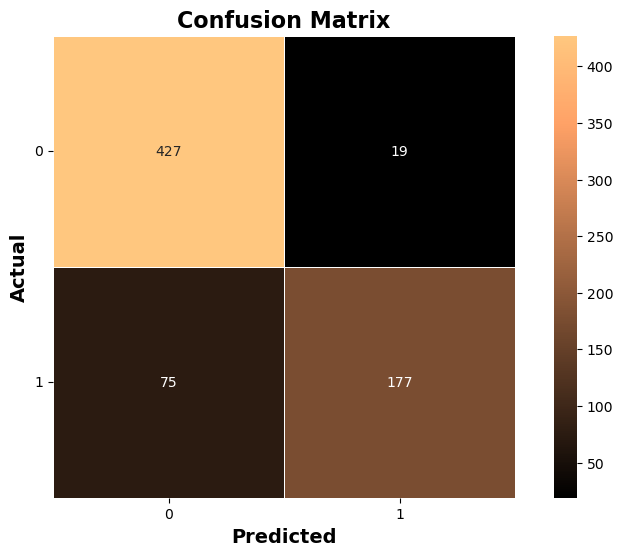

In [21]:
from sklearn.metrics import confusion_matrix

pytorch_predictions = model_lr_pytorch(x_test_tensor)
pytorch_predictions = (pytorch_predictions > 0.5).float().detach().numpy().flatten()

y_test_numpy = y_test_tensor.numpy().flatten()
cm = confusion_matrix(y_test_numpy, pytorch_predictions)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='copper', linewidths=0.4, square=True, cbar=True, xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel("Predicted", fontsize=14, fontweight="bold")
plt.ylabel("Actual", fontsize=14, fontweight="bold")
plt.title("Confusion Matrix", fontsize=16, fontweight="bold")
plt.yticks(rotation=360)
plt.show()

The results explain

that hyperparameter tuning greatly improved the performance of the Logistic Regression model. The before Logistic Regression model that was built and trained through scikit-learn achieved a accuracy of 71%, meanwhile the improved and enhanced Logistic Regression model that was  built and trained through pytorch achieved a test accuracy of 86%. The model performance improved by 21% through hyperparameter tuning in pytorch. 

Additionally, the original dataset split was 80% training&validation and 20% testing. The enhanced model made use of 70% training, 15% validation, and 15% testing, which also aided to the improvement of the model's performance. 

The improved Logistic Regression model showed the same performance with the Decision Tree Classifier model, which was determined the best model from the Kaggle dataset analysis project before. Based on the generated confusion matrix of the 20% test dataset, the total number of misclassifications by the Logistic Regression model was 95 datapoints - 18 false positives and 77 false negatives. On the other hand, the total number of correct classifications was 603 datapoints including 428 true positives and 175 true negatives. 